# Data and Sampling Distributions

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skewnorm
import seaborn as sns

## Random Sampling and Sample Bias

- **Sample**: A subset from a larger data set.
- **Population**: The larger data set or idea of a data set.
- **N (n)**: The size of the population (sample).
- **Random sampling**: Drawing elements into a sample at random.
- **Stratified sampling**: Dividing the population into strata and randomly sampling from each strata.
- **Simple random sample**: The sample that results from random sampling without stratifying the population.
- **Sample bias**: A sample that misrepresents the population.

Random sampling involves drawing samples from a population where each sample has equal weight of being drawn. This is called a _simple random sample_. If sampling is done with replacement the drawn sample goes back into the population and so can be drawn again. If the sampling is done without replacement one a sample is drawn it cannot be drawn again.

Sampling bias occurs when the drawn sample is different in some meaningful nonrandom way from the larger population it was meant to represent. For example, if you took a poll of who will win an election but the sample in the poll favours a particular party, your sample is biased towards that party and may not be representative of the population.

There is also a notion of self-selection bias. If you look at reviews for a product of company are view the portraying representative of the population? The users who are leaving reviews are not randomly selected, rather, they themselves have take the initative to write. This is self-selection bias - users who have left reviews may favour those with bad experiences / products.

### Key Takeaways

- Even in the era of big data, random sampling remains an important arrow in the data scientist’s quiver.
- Bias occurs when measurements or observations are systematically in error because they are not representative of the full population.
- Data quality is often more important than data quantity, and random sampling can reduce bias and facilitate quality improvement that would be prohibitively expensive.

## Selection Bias

- **Bias**: Systematic error
- **Data snooping**:  Extensive hunting through data in search of something interesting.
- **Vast search effect**: Bias or nonreproducibility resulting from repeated data modeling, or modeling data with large numbers of predictor variables.

Selection bias is a big problem in data science. If you repeatedly run different models and ask different questions with a large data set, you are bound to find something interesting. Is the result you found truly something interesting, or is it the chance outlier?

This can be guarded against by creating a holdout set which is take before any analysis is done. If the conclusions you draw on remaining dataset hold for the holdout set then you can be more confident in your conclusions. 

Selection bias can come from cherry-picking data, selection of time intervals that accenuate a particular statistical effect and stopping experiments early.

### Regression to the Mean

Regression to the mean refers to a phenomenon involving successive measurements on a given variable: extreme observations tend to be followed by more central ones. Attaching special focus and meaning to the extreme value can lead to a form of selection bias.

A classic example is sports. You have a rookie in their first year and performs extremely well but in the following season does not perform as well. They have regressed to the mean and is a consequence of a particular form of selection bias. The skill of the sports player is still their but their luck may not resulting in them regressing to the mean.

### Key Takeaways

- Specifying a hypothesis, then collecting data following randomization and random sampling principles, ensures against bias.
- All other forms of data analysis run the risk of bias resulting from the data collection/analysis process (repeated running of models in data mining, data snooping in research, and after-the-fact selection of interesting events).

## Sampling Distribution of a Statistic

- **Sample statistic**: A metric calculated for a sample of data drawn from a larger population.
- **Data distribution**: The frequency distribution of individual values in a data set.
- **Sampling distribution**: The frequency distribution of a sample statistic over many samples or resamples.
- **Central limit theorem**: The tendency of the sampling distribution to take on a normal shape as sample size rises.
- **Standard error**: The variability (standard deviation) of a sample statistic over many samples (not to be confused with standard deviation, which, by itself, refers to variability of individual data values).

Typically, a sample is drawn with the goal of measuring something (with a sample statistic) or modeling something (with a statistical or machine learning model). Since our estimate or model is based on a sample, it might be in error; it might be different if we were to draw a different sample. We are therefore interested in how different it might be—a key concern is sampling variability. If we had lots of data, we could draw additional samples and observe the distribution of a sample statistic directly. Typically, we will calculate our estimate or model using as much data as is easily available, so the option of drawing additional samples from the population is not readily available.

**It is important to distinguish between the distribution of the individual data points, known as the data distribution, and the distribution of a sample statistic, known as the sampling distribution.**

The distribution of a sample statistic such as the mean is likely to be more regular and bell-shaped than the distribution of the data itself. The larger the sample that the statistic is based on, the more this is true. Also, the larger the sample, the narrower the distribution of the sample statistic. Below is an example of this. The left plot is our synthetic skewed data distribution. The right are two distributions of sample statistics overlaid. The blue is 1000 drawn samples of 5 values with the mean each each sample calculated and then plotted. The orange is the same except there are 20 values in each drawn sample. Notice how the 20 sample (orange) is narrower and more bell-shaped than the 5 sample (blue) sample statistic disribution.

In [25]:
r = skewnorm.rvs(20, size=1000)
sample_5 = [np.mean(np.random.choice(r, size=5)) for _ in range(1000)]
sample_20 = [np.mean(np.random.choice(r, size=20)) for _ in range(1000)]

Text(0.5, 1.0, 'Sample Statistic Distribution')

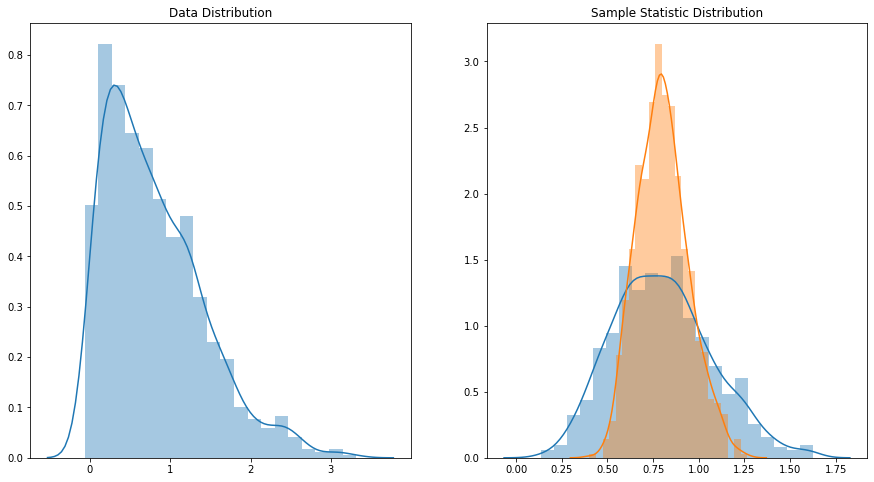

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))
sns.distplot(r, ax=axes[0])
sns.distplot(sample_5, ax=axes[1])
sns.distplot(sample_20, ax=axes[1])
axes[0].set_title('Data Distribution')
axes[1].set_title('Sample Statistic Distribution')